<a href="https://colab.research.google.com/github/hbkaye/EEG_project/blob/master/treadmill_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyedflib
import numpy as np
import pyedflib
import os
import sys
import numpy  as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import plot
from scipy import signal
import seaborn as sns

# Specifying the path

file_name = os.path.join('/content/drive/My Drive/Datasets/test_10min_Patient03_ankit_3_feb.edf')
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

OSError: ignored

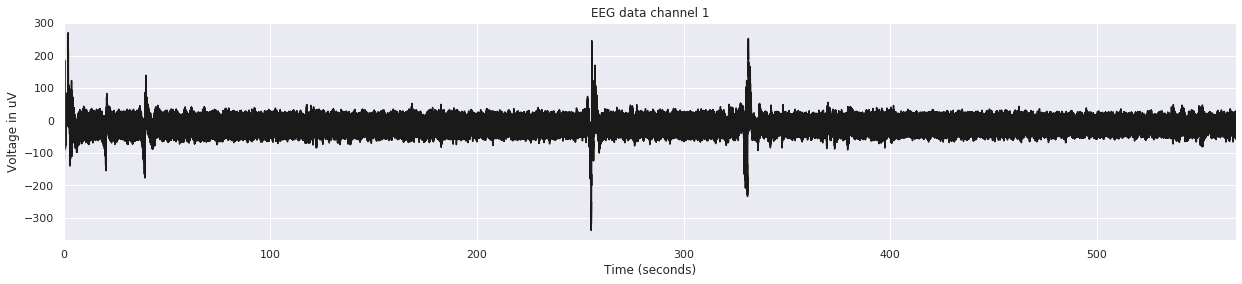

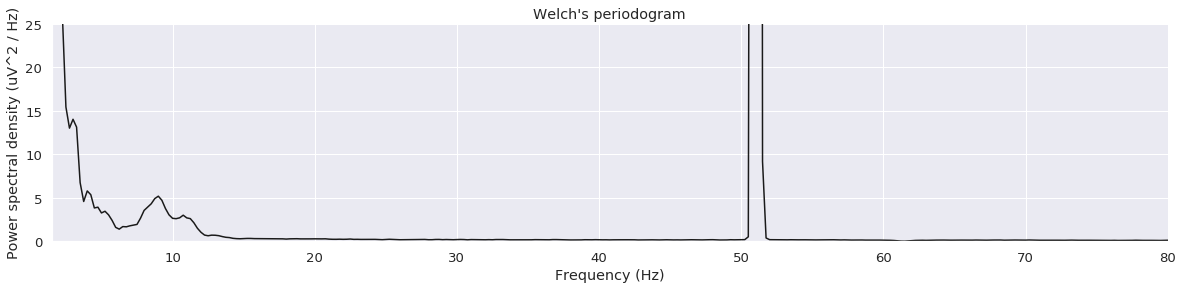

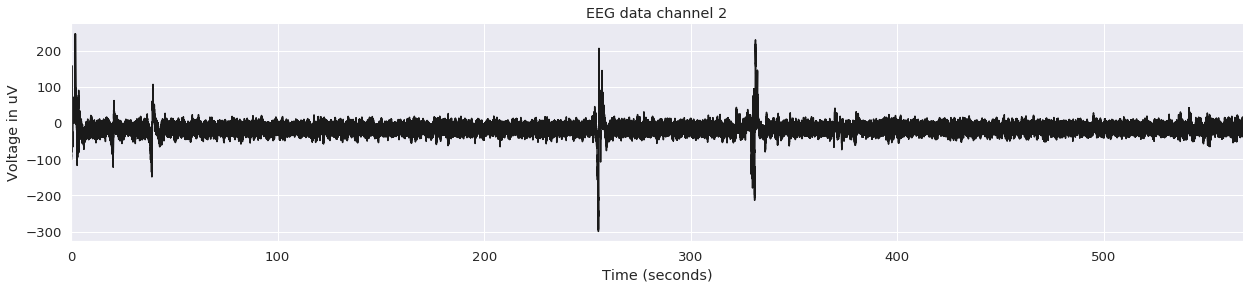

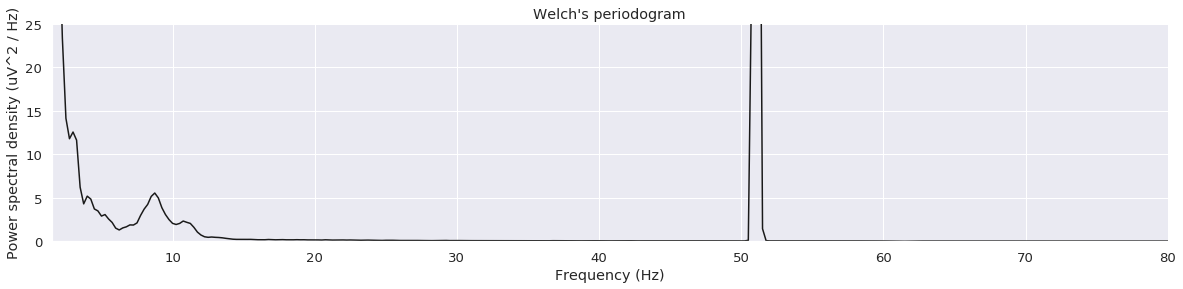

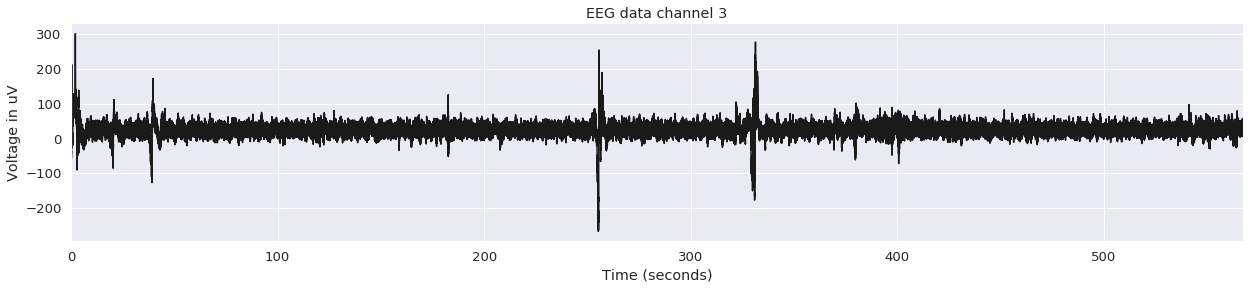

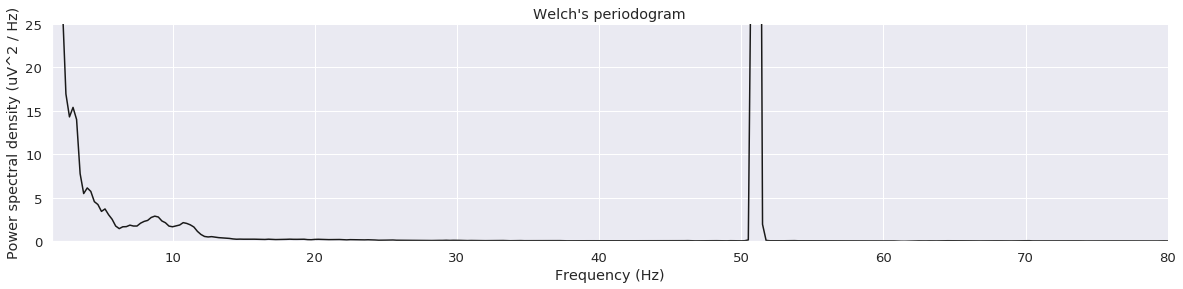

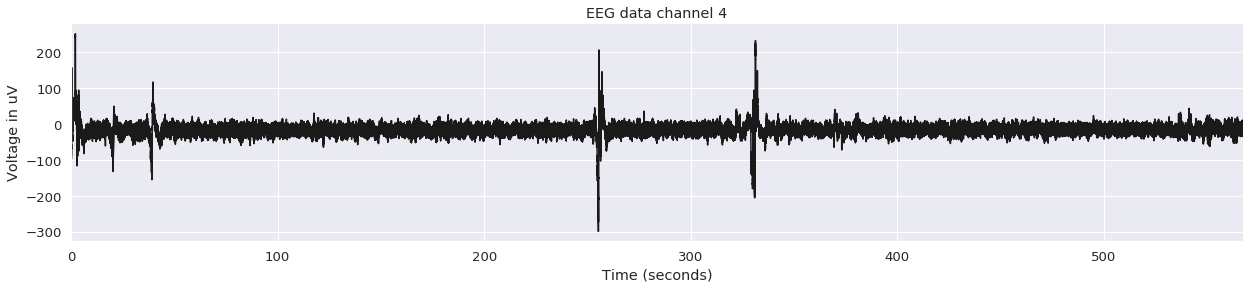

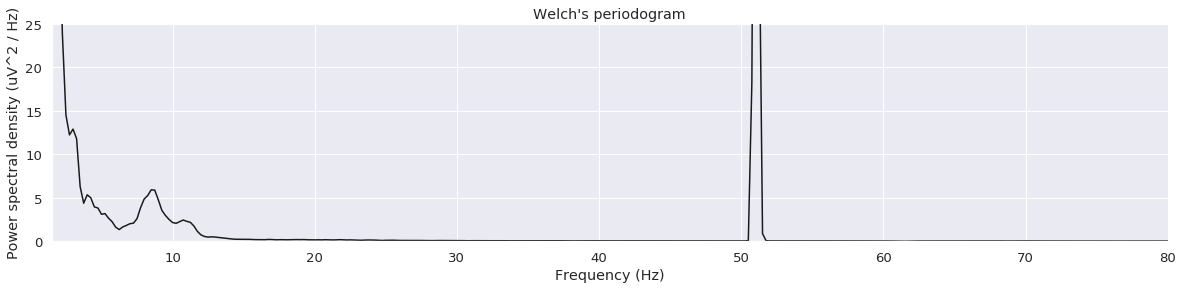

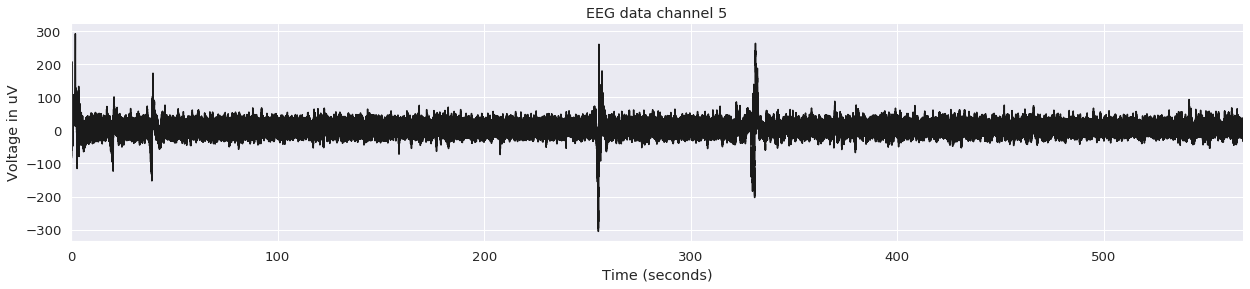

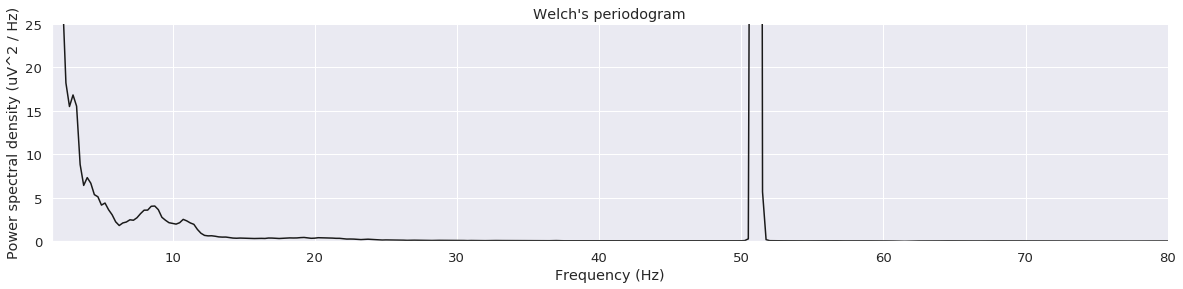

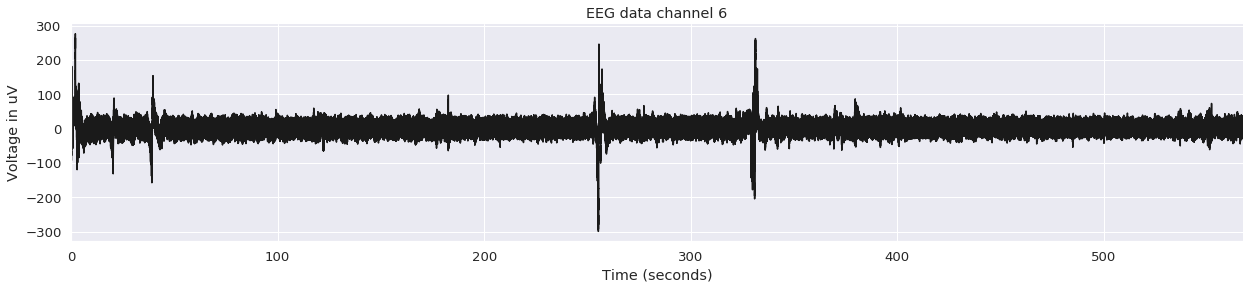

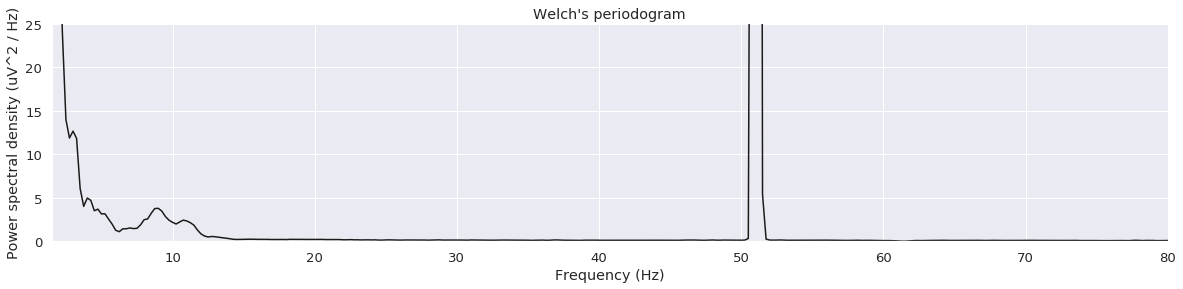

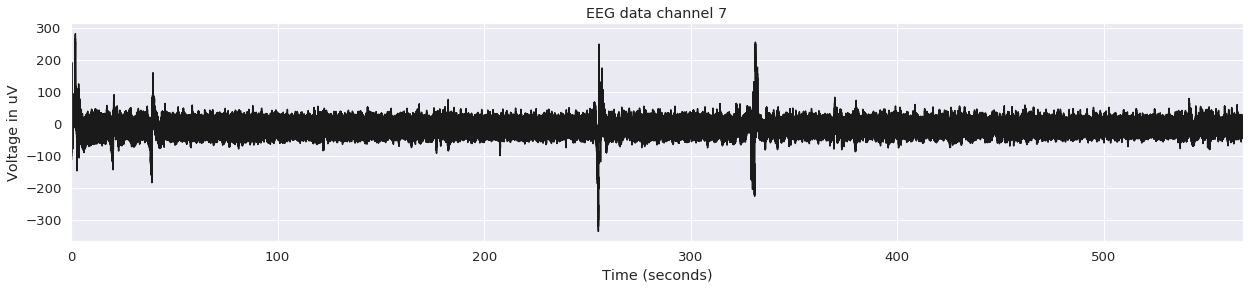

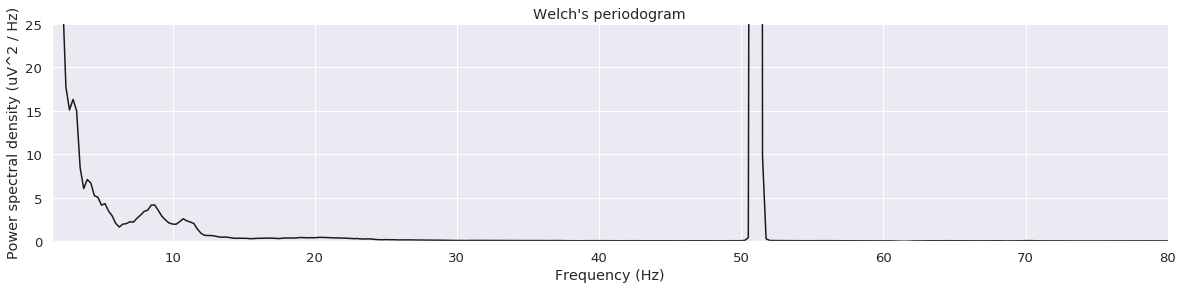

In [0]:

sns.set(font_scale=1)
for i in range(0,7):
  data = sigbufs[i]

  # Define sampling frequency and time vector
  sf = 512.
  time = np.arange(data.size) / sf

  # Plot the signal
  fig, ax = plt.subplots(1, 1, figsize=(21, 4))
  plt.plot(time, data, lw=1.5, color='k')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Voltage in uV')
  plt.xlim([time.min(), time.max()])
  plt.title('EEG data channel ' + str(i+1))
  sns.despine()

  # Define window length (4 seconds)
  win = 4 * sf
  freqs, psd = signal.welch(sigbufs[i], sf, nperseg=win)
  
  # Plot the power spectrum
  sns.set(font_scale=1.2, style='darkgrid')
  plt.figure(figsize=(20, 4))
  plt.plot(freqs, psd, color='k', lw=1.5)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Power spectral density (uV^2 / Hz)')
  plt.ylim([0, 25])
  plt.xlim([1.5, 80])
  plt.title("Welch's periodogram")
  #plt.xlim([0, freqs.max()])
  sns.despine()
  #psd.max() * 1.1

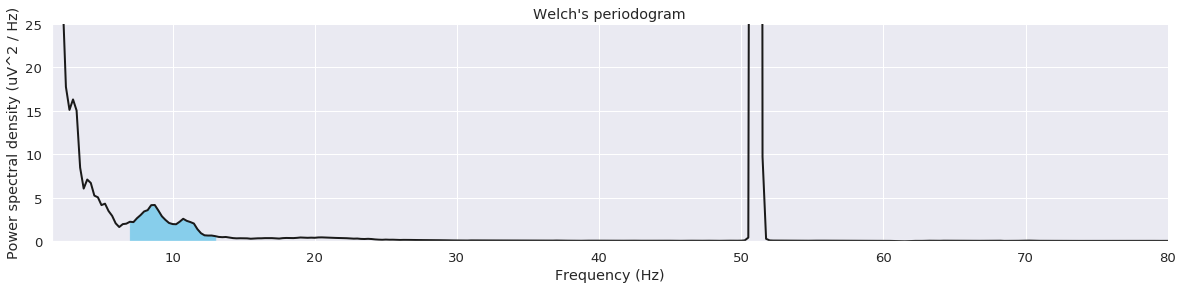

In [0]:
# Define delta lower and upper limits
low, high = 7, 13

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(20, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([1.5, 80])
plt.ylim([0, 25])
plt.title("Welch's periodogram")
sns.despine()
#psd.max() * 1.1